# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
import numpy as np

In [2]:
# ... WRITE YOUR CODE HERE...
import pandas as pd
netw1 = pd.read_csv('../data/network1.csv', comment='#')
netw1.columns = ['From', 'To']
netw1.head(10)

,From,To
0,1,5128
1,2,7008
2,3,10476
3,4,9671
4,5,1696
5,5,7185
6,5,6702
7,6,875
8,6,11859
9,7,4413


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
G1 = nx.Graph()
G1 = nx.from_pandas_edgelist(netw1, 'From', 'To')

In [5]:
G1.number_of_nodes()

13032

In [6]:
G1.number_of_edges()

18583

In [7]:
G1.degree[2]

1

#### Exercise 2.2:  Node degree distribution

In [8]:
def degree_dist(graph):
    degree_list = [] 
    for i in range(1,graph.number_of_nodes()+1):
        degree_list.append(graph.degree[i])
    degree_list = sorted(degree_list)
    
    plt.bar(degree_list, return_counts=True)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   38   39   40   41   42   44
   45   46   47   48   49   50   51   52   53   54   55   56   57   58
   59   60   62   64   69   70   73   75   77   79   81   86   91   95
  106  113  126  128  129  141  148  155  159  168  194  207  216  225
  248  292  300  379  455  467  619  691 1083 1482]


Text(0.5, 0, 'log(degree)')

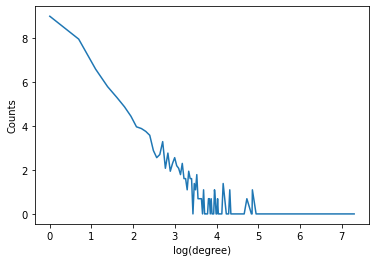

In [59]:
degree_sequence = sorted((d for n, d in G1.degree()), reverse=True)
deg, counts = np.unique(degree_sequence, return_counts = True)
plt.plot(np.log(deg), np.log(counts))
print(deg)
plt.ylabel("Counts")
plt.xlabel("log(degree)")

#### Properties of degree distribution
* prop one
* prop two

#### Is it close to a well-known probability distribution? If so, provide an estimation of its parameter(s)?
Exponential distribution


#### Exercise 2.3: Giant component

In [11]:
# Count the number of connected components
max_clique = 0
for clique in nx.enumerate_all_cliques(G1):
    if len(clique) > max_clique:
        max_clique = len(clique)
        
print(max_clique)

9


In [34]:
connected_comp_sizes = [len(c) for c in sorted(nx.connected_components(G1), key=len, reverse=True)]
print("Number of connected components is", len(connected_comp_sizes))
print("Size of giant component =",connected_comp_sizes[0])

Number of connected components is 192
Size of giant component = 12575


#### Exercise 2.4: Short paths & Small-worlds

In [40]:
connected_comp = [c for c in sorted(nx.connected_components(G1), key=len)]

#iterate through all connected components
for comp in connected_comp:
    N = len(comp)
    shortest_paths = []
    for i in range(1,N+1):
        for j in range(i+1, N+1):
            if (i!=j):
                shortest_paths.append(len(nx.shortest_path(G1,comp[i],comp[j])))
print(shortest_paths)

TypeError: 'set' object is not subscriptable

In [55]:
#before adding check if nodes connected
N = len(G1)
shorts_paths = []
for i in range(1, N+1):
    for j in range(i+1, N+1):
        if (i!=j):
            if (nx.has_path(G1,i,j)):
                shortest_paths.append(nx.astar_path_length(G1,i,j))
print(shorts_paths)         

KeyboardInterrupt: 

In [ ]:
#What is the distribution of path lengths between any two nodes in the network?

In [56]:
avg_length = []
for C in (G1.subgraph(c).copy() for c in nx.connected_components(G1)):
    avg_length.append(nx.average_shortest_path_length(C))
print(sum(avg_length) / len(avg_length))

1.107280661100677


In [57]:
shortest_length = []
for C in (G1.subgraph(c).copy() for c in nx.connected_components(G1)):
    shortest_length.append(nx.all_shortest_paths(C))
#print(sum(avg_length) / len(avg_length))
print(shortest_length)

TypeError: all_shortest_paths() missing 2 required positional arguments: 'source' and 'target'

In [58]:
for C in (G1.subgraph(c).copy() for c in nx.connected_components(G1)):
    length = dict(nx.all_pairs_shortest_path_length(C))
    

In [78]:
for C in (G1.subgraph(c).copy() for c in nx.connected_components(G1)):
    length2 = list(nx.all_pairs_shortest_path_length(C))

In [84]:
print(list(length2[0][1].values()))

[0, 1]


In [80]:
for i in length.values():
    print(i)
print(length)

resultslist = list(length.items())
print(resultslist.values())

{11483: 0, 12653: 1}
{12653: 0, 11483: 1}
{11483: {11483: 0, 12653: 1}, 12653: {12653: 0, 11483: 1}}


AttributeError: 'list' object has no attribute 'values'

In [ ]:
def reachable_r(r):
    #what is the average number of nodes reachable within a distance r (in number of hops) of any other node in the network?
    r_paths_list = []

#### Exercise 2.5: Network comparison

#### Exercise 2.6: Network identification